In [1]:
import os
os.chdir('../')
print(os.getcwd())

/home/dli/master-project/ynet_adaptive_work


In [2]:
from utils.dataset import *

In [3]:
data_raw='sdd_ynet/dataset_raw' # See README.md on how to download the raw dataset
step=12
window_size=20
stride=20
obs_len=8
data_filter='sdd_ynet/dataset_filter_custom' # Path to new dataset in sdd_ynet directory
labels=['Pedestrian', 'Biker']

In [4]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [6]:
os.chdir('../')

In [213]:
df = load_raw_dataset(data_raw, step, window_size, stride)

In [8]:
df.shape

(465200, 8)

In [9]:
df

,trackId,frame,label,x,y,sceneId,metaId,frame_diff
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0
...,...,...,...,...,...,...,...,...
465195,7,460,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465196,7,472,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465197,7,484,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465198,7,496,Pedestrian,1922.0,173.0,quad_3,23259,1.0


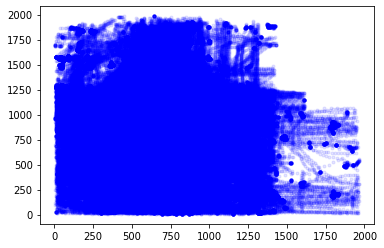

In [48]:
df_b0 = df[df['sceneId'] == 'bookstore_0']
df_b0_grouped = df.groupby('metaId')
for group_key in df_b0_grouped.groups.keys():
    group = df_b0_grouped.get_group(group_key)
    plt.plot(group['x'], group['y'], 'b.', alpha=0.1)

In [22]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [23]:
train_trajnet = pd.read_pickle('./sdd_ynet/ynet_additional_files/train_trajnet.pkl')

In [24]:
train_trajnet

,frame,trackId,x,y,sceneId,metaId
0,0,100,757.0,918.5,bookstore_0,0
1,12,100,765.0,918.5,bookstore_0,0
2,24,100,773.0,918.5,bookstore_0,0
3,36,100,780.5,918.5,bookstore_0,0
4,48,100,788.5,919.5,bookstore_0,0
...,...,...,...,...,...,...
169875,11424,273,89.5,948.5,nexus_9,8493
169876,11436,273,80.0,944.0,nexus_9,8493
169877,11448,273,72.0,940.0,nexus_9,8493
169878,11460,273,64.0,936.0,nexus_9,8493


### Check datasets consistency before and after changes

In [16]:
new, old = [], []
vel_ranges = ['0.25_0.75', '1.25_1.75', '2.25_2.75', '3.25_3.75']
for r in vel_ranges:
    new.append(pd.read_pickle(f'sdd_ynet/dataset_filter/{r}.pkl'))
    old.append(pd.read_pickle(f'sdd_ynet/dataset_filter/dataset_ped_biker/gap/{r}.pkl'))


In [18]:
len(new), len(old)

(4, 4)

In [28]:
for i, _ in enumerate(vel_ranges):
    print(new[i].iloc[:, :-1].equals(old[i].iloc[:, :-1]))

True
True
True
True


In [208]:
varf_list = ['min_dist', 'avg_den', 'tot_den']

In [210]:
[s for s in varf_list if 'den' in s]

['avg_den', 'tot_den']

In [212]:
any('den' in mystring for mystring in varf_list)

True

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
penguins = sns.load_dataset("penguins")

In [32]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


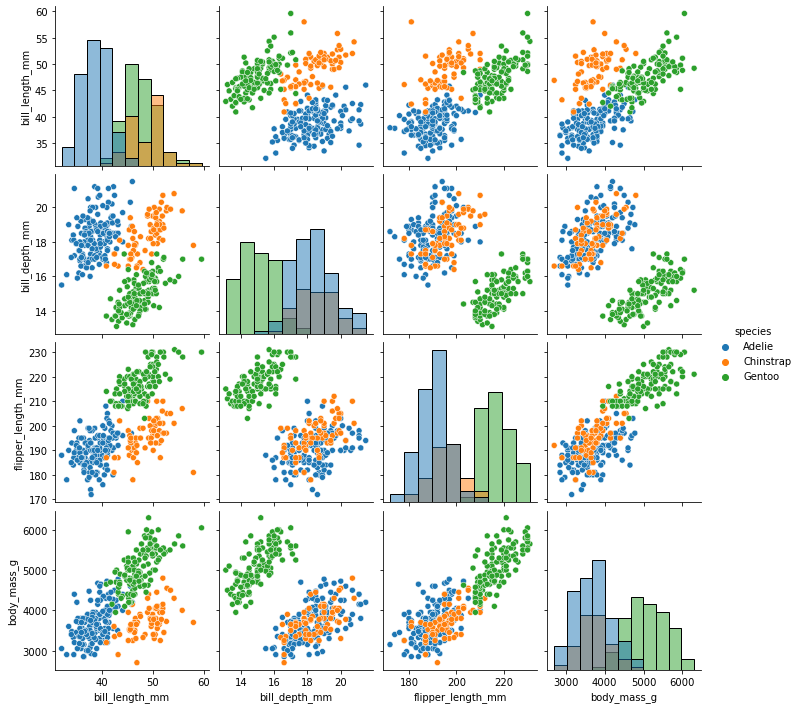

In [31]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

In [5]:
penguins.species.unique(), penguins.sex.unique()

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Male', 'Female', nan], dtype=object))

In [8]:
penguins_valid = penguins[(~penguins.sex.isnull())]

In [9]:
penguins_valid.shape, penguins.shape

((333, 7), (344, 7))

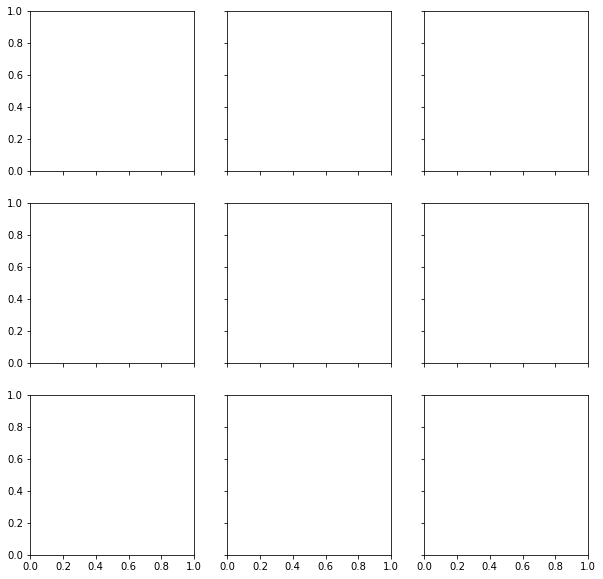

In [12]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

In [15]:
axs[1][1]

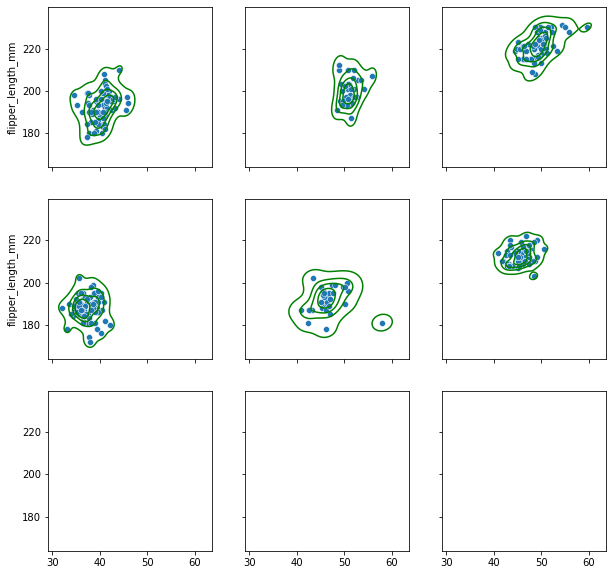

In [24]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)
for c, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
    for r, sex in enumerate(['Male', 'Female']):
        d = penguins_valid[(penguins_valid.species == species) & (penguins_valid.sex == sex)]
        sns.scatterplot(x=d.bill_length_mm, y=d.flipper_length_mm, ax=axs[r,c])
        sns.kdeplot(x=d.bill_length_mm, y=d.flipper_length_mm, ax=axs[r,c], 
            levels=5, color='green')
        # axs[r, c].scatter(d.bill_length_mm, d.flipper_length_mm)

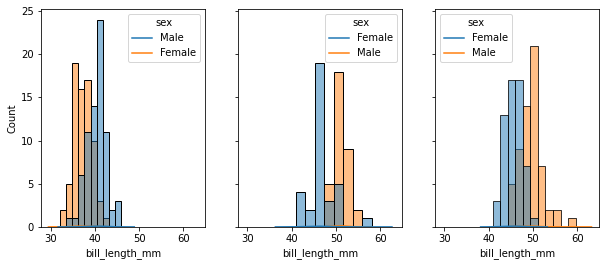

In [40]:
fig, axs = plt.subplots(1,3, figsize=(10, 4), sharex=True, sharey=True)
for c, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
    d = penguins_valid[(penguins_valid.species == species)]
    sns.histplot(data=d, x='bill_length_mm', ax=axs[c], hue='sex', alpha=0.5)
    sns.kdeplot(data=d, x='bill_length_mm', ax=axs[c], hue='sex', levels=5)